# Fundamentos de Data Science

### Análisis de Ventas de Videojuegos en 2024

## Requisitos:

Tu tarea es limpiar y explorar un dataset que contiene información sobre las ventas de videojuegos en el año 2024. Este análisis es crucial para entender las tendencias de mercado y los factores que influyen en las ventas de videojuegos.

El dataset puede ser encontrado aquí: https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024

## Limpieza de datos con Python:

### 1. Limpieza de datos con Python:

* Detección y eliminación de valores duplicados: Asegúrate de que cada registro en el dataset sea único.
* Verificación y ajuste de tipos de datos: Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Consistencia en valores categóricos: Identifica y corrige cualquier inconsistencia en los valores categóricos (por ejemplo, ‘Action’, ‘action’, ‘ACTION’).
* Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. Rellena los valores faltantes con un marcador adecuado para el tipo de dato.
* Detección de datos anómalos: Identifica y corrige cualquier punto de dato inapropiado o inusual (por ejemplo, un videojuego con ventas negativas).

### 2. Exploración de datos con Python:

* Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
* Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

### 3. Análisis adicional:

* Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia central y dispersión para las variables numéricas.
* Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote en las visualizaciones y estadísticas descriptivas.
* Análisis de correlación: Identifica y analiza las correlaciones más fuertes entre las variables del dataset.
* Predicción de ventas: Utiliza un modelo de regresión simple para predecir las ventas futuras basadas en los datos disponibles.

## Entrega:

* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 5 visualizaciones.
* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
* NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

## Notas:

* Para evitar que otros estudiantes copien tu trabajo, asegúrate de que el código no esté guardado en un repositorio público.
* Para minimizar la deducción de puntos, asegúrate de cargar los requisitos completos.
* Si tienes problemas para cargar archivos en la aplicación de exámenes, por favor NO desbloquees otro examen. Envía el archivo por correo electrónico a tu instructor.
* Puedes usar cualquier recurso que tengas disponible (notas de clase, Google, Stackoverflow, etc.) – PERO DEBES CITAR CUALQUIER FUENTE UTILIZADA. Puedes citar fuentes en forma de comentario de código o una celda de texto con enlaces a cualquier recurso que hayas utilizado. La falta de citas será considerada plagio y resultará en la falla del examen.
* No puedes recibir ayuda de ninguna otra persona en este código. Esto incluye compañeros de clase, exalumnos, tu instructor, etc. La colaboración con otra persona en este examen será considerada plagio y resultará en la falla del examen y puede resultar en la expulsión del programa.
* Se permite el uso de LLM (Copilot, GPT, etc.), pero solo como guía o para depuración. Se espera que los estudiantes pongan su máximo esfuerzo.

# Resolución

### Lectura inicial de los datos:

In [565]:
import pandas as pd

# Carga de dataframe
camino_datos = "../data/vgchartz-2024.csv"
df = pd.read_csv(camino_datos, delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [566]:
# Obtenemos datos estadísticos iniciales del dataset
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [567]:
# Verificamos la cabecera
df.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07


### Notas.

Según los siguientes datos:

* Script scraper utilizado para crear el dataset: https://github.com/patkle/VGChartz-Scrapy-Project/blob/main/vgchartz/spiders/game_statistics.py
* Página de ejemplo: https://www.vgchartz.com/games/games.php?page=11&order=Sales&ownership=Both&direction=DESC&showtotalsales=1&shownasales=1&showpalsales=1&showjapansales=1&showothersales=1&showpublisher=1&showdeveloper=1&showreleasedate=1&showlastupdate=1&showvgchartzscore=1&showcriticscore=1&showuserscore=1&showshipped=1

Es posible determinar que las cantidades de ventas son en millones, algo que no está especificado en el dataset.

In [568]:
# Para mayor claridad a la hora del análisis, se decide renombrar
# las columnas de sales con la unidad de medida (millones).
df.rename(
    columns={
        "total_sales": "total_sales_millions",
        "jp_sales": "jp_sales_millions",
        "na_sales": "na_sales_millions",
        "pal_sales": "pal_sales_millions",
        "other_sales": "other_sales_millions",
    },
    inplace=True,
)

### Verificación de datos duplicados

En esta sección, se procede a verificar si el dataset posee o no datos duplicados. Para esto, las columnas que se pueden usar son: title, console

In [569]:
df['title_console'] = df["title"] + "_" + df["console"]
df[df['title_console'].map(df["title_console"].value_counts() > 1)].sort_values("title").shape


(449, 15)

In [570]:
# Técnica de filtro por conteos obtenida desde aquí: https://stackoverflow.com/a/58536543
df_titulos_no_unicos = df[df['title_console'].map(df["title_console"].value_counts() > 1)].sort_values("title")
df_titulos_no_unicos

,img,title,console,genre,publisher,developer,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update,title_console
32538,/games/boxart/default.jpg,Absolute Chess,DSiW,Misc,Unknown,Tasuke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absolute Chess_DSiW
32537,/games/boxart/full_absolute-chess_3AmericaFron...,Absolute Chess,DSiW,Misc,Tasuke,Tasuke,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-09,NaN,Absolute Chess_DSiW
56164,/games/boxart/8720327ccc.jpg,Ace Combat 5: The Unsung War,PS2,Simulation,Namco,Project ACES,8.0,NaN,NaN,NaN,NaN,NaN,2004-10-25,NaN,Ace Combat 5: The Unsung War_PS2
55926,/games/boxart/full_2886030AmericaFrontccc.jpg,Ace Combat 5: The Unsung War,PS2,Simulation,Namco,Namco,NaN,NaN,NaN,NaN,NaN,NaN,2004-10-25,NaN,Ace Combat 5: The Unsung War_PS2
17417,/games/boxart/full_2043543AmericaFrontccc.jpg,Adventure Time: The Secret of the Nameless Kin...,X360,Action-Adventure,Little Orbit,Way Forward,NaN,0.01,0.01,NaN,NaN,0.00,2014-11-18,2019-05-10,Adventure Time: The Secret of the Nameless Kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,/games/boxart/full_4455632JapanFrontccc.jpg,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...,DS,Misc,IE Institute,IE Institute,NaN,0.66,NaN,0.66,NaN,NaN,2006-11-09,NaN,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...
1527,/games/boxart/full_7465804AmericaFrontccc.jpg,Zoo Tycoon DS,DS,Strategy,THQ,Blue Fang Games,4.6,0.98,0.86,0.01,0.03,0.07,2005-10-11,NaN,Zoo Tycoon DS_DS
39270,/games/boxart/1413324ccc.gif,Zoo Tycoon DS,DS,Misc,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zoo Tycoon DS_DS
43231,/games/boxart/full_8161397JapanFrontccc.jpg,bit Generations: Soundvoyager,GBA,Puzzle,Nintendo,skip Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,2006-07-27,NaN,bit Generations: Soundvoyager_GBA


Se procede a limpiar las columnas duplicadas antes de eliminarlas.

In [571]:
juegos_no_unicos = df[df['title_console'].map(df["title_console"].value_counts() > 1)].sort_values("title")["title"].unique()

# También, a tarvés de la exploración, se notó el uso del valor Unknown para denotar no existencia
# de datos en las columnas publisher y developer.
# Para eliminar los duplicados, se toma como estrategia sumar las ventas de duplicados,
# y en el caso de las reseñas, se toma el promedio.
# En caso de que existan Unknown en las columnas, se reemplazan por el valor que no sea unknown en la lista.

# Se itera sobre cada juego y se completan campos incompletos.
for juego_no_unico in juegos_no_unicos:
    df_juego_unico = df[df["title"] == juego_no_unico]
    # En el caso de las columnas de totales, se suman los valores.
    total_sale_millions = df_juego_unico["total_sales_millions"].sum()
    na_sales_millions = df_juego_unico["na_sales_millions"].sum()
    jp_sales_millions = df_juego_unico["jp_sales_millions"].sum()
    pal_sales_millions = df_juego_unico["pal_sales_millions"].sum()
    other_sales_millions = df_juego_unico["other_sales_millions"].sum()

    # En el caso de la reseña, se toma el promedio.
    critic_score = df_juego_unico["critic_score"].mean()
    
    publisher = "Unknown"
    developer = "Unknown"

    df_juego_unico_publisher_no_unknown = df_juego_unico[df_juego_unico["publisher"] != "Unknown"]
    
    if df_juego_unico_publisher_no_unknown.shape[0] > 0:
        publisher = df_juego_unico_publisher_no_unknown["publisher"].unique()[0]

    df_juego_unico_developer_no_unknown = df_juego_unico[df_juego_unico["developer"] != "Unknown"]

    if df_juego_unico_developer_no_unknown.shape[0] > 0:
        publisher = df_juego_unico_developer_no_unknown["publisher"].unique()[0]

    del df_juego_unico_publisher_no_unknown
    del df_juego_unico_developer_no_unknown

    if total_sale_millions != 0.0:
        df.loc[(df["title"] == juego_no_unico), "total_sales_millions"] = total_sale_millions

    if na_sales_millions != 0.0:
        df.loc[(df["title"] == juego_no_unico), "na_sales_millions"] = na_sales_millions

    if jp_sales_millions != 0.0:
        df.loc[(df["title"] == juego_no_unico), "jp_sales_millions"] = jp_sales_millions

    if pal_sales_millions != 0.0:
        df.loc[(df["title"] == juego_no_unico), "pal_sales_millions"] = pal_sales_millions

    if other_sales_millions != 0.0:
        df.loc[(df["title"] == juego_no_unico), "other_sales_millions"] = other_sales_millions

    if critic_score != 0.0:
        df.loc[(df["title"] == juego_no_unico), "critic_score"] = critic_score

    if publisher != "Unknown":
        df.loc[(df["title"] == juego_no_unico), "publisher"] = publisher

    if developer != "Unknown":
        df.loc[(df["title"] == juego_no_unico), "developer"] = developer

    del df_juego_unico


In [572]:
# Volvemos a visualizar los juegos no únicos:
df_titulos_no_unicos = df[df['title_console'].map(df["title_console"].value_counts() > 1)].sort_values("title")
df_titulos_no_unicos

,img,title,console,genre,publisher,developer,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update,title_console
32538,/games/boxart/default.jpg,Absolute Chess,DSiW,Misc,Tasuke,Tasuke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absolute Chess_DSiW
32537,/games/boxart/full_absolute-chess_3AmericaFron...,Absolute Chess,DSiW,Misc,Tasuke,Tasuke,NaN,NaN,NaN,NaN,NaN,NaN,2010-08-09,NaN,Absolute Chess_DSiW
56164,/games/boxart/8720327ccc.jpg,Ace Combat 5: The Unsung War,PS2,Simulation,Namco,Project ACES,8.0,NaN,NaN,NaN,NaN,NaN,2004-10-25,NaN,Ace Combat 5: The Unsung War_PS2
55926,/games/boxart/full_2886030AmericaFrontccc.jpg,Ace Combat 5: The Unsung War,PS2,Simulation,Namco,Namco,8.0,NaN,NaN,NaN,NaN,NaN,2004-10-25,NaN,Ace Combat 5: The Unsung War_PS2
17417,/games/boxart/full_2043543AmericaFrontccc.jpg,Adventure Time: The Secret of the Nameless Kin...,X360,Action-Adventure,Little Orbit,Way Forward,NaN,0.15,0.01,NaN,0.13,0.00,2014-11-18,2019-05-10,Adventure Time: The Secret of the Nameless Kin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438,/games/boxart/full_4455632JapanFrontccc.jpg,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...,DS,Misc,IE Institute,IE Institute,NaN,1.32,NaN,1.32,NaN,NaN,2006-11-09,NaN,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...
1527,/games/boxart/full_7465804AmericaFrontccc.jpg,Zoo Tycoon DS,DS,Strategy,THQ,Blue Fang Games,4.6,0.98,0.86,0.01,0.03,0.07,2005-10-11,NaN,Zoo Tycoon DS_DS
39270,/games/boxart/1413324ccc.gif,Zoo Tycoon DS,DS,Misc,THQ,Unknown,4.6,0.98,0.86,0.01,0.03,0.07,NaN,NaN,Zoo Tycoon DS_DS
43231,/games/boxart/full_8161397JapanFrontccc.jpg,bit Generations: Soundvoyager,GBA,Puzzle,Nintendo,skip Ltd.,NaN,NaN,NaN,NaN,NaN,NaN,2006-07-27,NaN,bit Generations: Soundvoyager_GBA


Con esta estrategia, la idea es que todos los duplicados tengan los mismos valores, para luego eliminar dichos duplicados de la lista

In [573]:
# Se procede a eliminar los duplicados
df.drop_duplicates(subset="title_console", keep="first", inplace=True)

In [574]:
# Verificamos de vuelta los duplicados
df_titulos_no_unicos = df[df['title_console'].map(df["title_console"].value_counts() > 1)].sort_values("title")
cant_titulos_no_unicos = df_titulos_no_unicos.shape[0]

print(f"Cant. títulos no únicos: {cant_titulos_no_unicos}")

Cant. títulos no únicos: 0


Finalmente, se eliminaron los elementos duplicados.

In [575]:
# Eliminamos la columna title_console, ya que solo fue usada para obtener titulos no únicos.
del df_titulos_no_unicos
df.drop("title_console", axis=1, inplace=True)
df

,img,title,console,genre,publisher,developer,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


Ahora, verificamos las columnas categóricas

In [576]:
# Primero, verificamos la columna genre.
generos_unicos = df["genre"].unique()
print(generos_unicos)

['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Role-Playing'
 'Simulation' 'Racing' 'Music' 'Misc' 'Fighting' 'Platform' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Education' 'Board Game'
 'Visual Novel']


Como no existen errores en la columna de géneros, se puede continuar con otros análisis.

### Análsis de datos incorrectos.

En este paso, se analiza si existe algun valor incorrecto en el dataset.

In [577]:
conteo_ventas_totales_incorrectas = df[df["total_sales_millions"] < 0.0].shape[0]
conteo_ventas_na_incorrectas = df[df["na_sales_millions"] < 0.0].shape[0]
conteo_ventas_jp_incorrectas = df[df["na_sales_millions"] < 0.0].shape[0]
conteo_ventas_pal_incorrectas = df[df["pal_sales_millions"] < 0.0].shape[0]
conteo_ventas_other_incorrectas = df[df["other_sales_millions"] < 0.0].shape[0]

print(f"Conteo ventas totales incorrectas: {conteo_ventas_totales_incorrectas}")
print(f"Conteo ventas jp incorrectas: {conteo_ventas_jp_incorrectas}")
print(f"Conteo ventas pal incorrectas: {conteo_ventas_pal_incorrectas}")
print(f"Conteo ventas other incorrectas: {conteo_ventas_pal_incorrectas}")

Conteo ventas totales incorrectas: 0
Conteo ventas jp incorrectas: 0
Conteo ventas pal incorrectas: 0
Conteo ventas other incorrectas: 0


Como se puede visualizar, no existe ninguna venta incorrecta. Se procede a analizar las reseñas (deberían estar entre 0 y 10).

In [578]:
conteo_resenhas_incorrectas = df[(df["critic_score"] < 0.0) | df["critic_score"] > 10.0].shape[0]
print(f"Conteo reseñas incorrectas: {conteo_ventas_pal_incorrectas}")

Conteo reseñas incorrectas: 0


Tampoco se visualiza ninguna reseña con falor incorrecto.

In [579]:
# Primero verificamos si existen datos nulos en el dataset.add
from utils import obtener_estadisticas_datos_nulos

datos_nulos = obtener_estadisticas_datos_nulos(df)
datos_nulos

,datos sin NAs en q,Na en q,Na en %
critic_score,6753,57038,89.41
jp_sales_millions,6779,57012,89.37
na_sales_millions,12730,51061,80.04
pal_sales_millions,12913,50878,79.76
other_sales_millions,15210,48581,76.16
last_update,17833,45958,72.04
total_sales_millions,18981,44810,70.25
release_date,56770,7021,11.01
developer,63774,17,0.03
img,63791,0,0.00


De los datos nulos se puede visualizar lo siguiente:

* Las reseñas no se suben muy comúnmente, por lo cual hay muchos datos vacíos. No obstante, no es posible hacer nada con esta columna ya que es decisión del usuario dejar reseñas o no, por lo cual esta columna no puede ser rellenada con otros datos.
* Hay una gran cantidad de ventas de videojuegos que están vacías, pero tal vez se pueda rellenar si los datos en total_sales están y las demás columnas esten llenas. Se debe verificar más adelante la situación.
* La columan last_update también tiene muchos valores vacíos. Tal vez se podría rellenarlo con release_date o no, dependiendo de la situación. Este campo tal vez pueda ser utilizado para ver que tan activos son los publicadores de los videojuegos con las mejoras en combinación con otros datos como cant. de ventas, entre otros.

In [580]:
# La primera columna a verificar sería la de jp_sales, ya que tiene una gran cantidad de NAs.

df[df["jp_sales_millions"].isna()].head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update
34,/games/boxart/full_7487992AmericaFrontccc.jpg,The Sims 3,PC,Simulation,Electronic Arts,EA Redwood Shores,8.5,7.96,1.01,NaN,6.46,0.50,2009-06-02,NaN
37,/games/boxart/full_3557116AmericaFrontccc.jpg,Call of Duty: World at War,X360,Shooter,Activision,Treyarch,8.5,7.50,4.88,NaN,1.91,0.71,2008-11-10,NaN
44,/games/boxart/full_9463304AmericaFrontccc.jpg,Just Dance 4,Wii,Music,Ubisoft,Ubisoft,NaN,6.89,4.05,NaN,2.21,0.62,2012-10-09,2018-01-31
57,/games/boxart/full_9289123AmericaFrontccc.jpg,Call of Duty: WWII,XOne,Shooter,Activision,Sledgehammer Games,NaN,6.23,3.75,NaN,1.91,0.57,2017-11-03,2017-12-30
58,/games/boxart/full_6168598AmericaFrontccc.jpg,Minecraft,PS3,Misc,Sony Computer Entertainment America,Mojang,NaN,6.05,2.21,NaN,2.86,0.99,2014-05-16,2018-08-05
59,/games/boxart/full_1425733AmericaFrontccc.jpg,Red Dead Redemption 2,XOne,Action-Adventure,Rockstar Games,Rockstar Games,NaN,5.77,3.76,NaN,1.47,0.54,2018-10-26,2018-11-02
62,/games/boxart/full_2958031AmericaFrontccc.jpg,LEGO Star Wars: The Complete Saga,Wii,Action,LucasArts,Traveller's Tales,8.0,5.66,3.57,NaN,1.57,0.52,2007-11-06,NaN
68,/games/boxart/full_4070815AmericaFrontccc.jpg,Call of Duty: World at War,PS3,Shooter,Activision,Treyarch,8.4,5.43,2.75,NaN,1.84,0.84,2008-11-10,NaN
69,/games/boxart/full_6418584AmericaFrontccc.jpg,Minecraft,XOne,Misc,Microsoft Studios,Mojang,NaN,5.43,3.23,NaN,1.71,0.49,2014-11-18,2018-09-14
79,/games/boxart/2419814ccc.jpg,Microsoft Flight Simulator,PC,Simulation,Microsoft,Microsoft,7.0,5.12,3.22,NaN,1.69,0.20,1996-10-31,NaN


Haciendo un calculo manual, en el caso de jp_sales al menos, la suma de total_sales es cercana a la suma de las ventas de otras columnas no nulas, por lo cual probablemente no se pueda usar este dato para rellenar los valores nulos. Para visualizer mejor, se pueden filtrar las filas en las que el resto de las ventas no sea nula pero jp_sales si, y analizar.

In [581]:
# Se elije un delta de diferencia teniendo en cuenta que las restas pueden ser inexactas
delta_diferencia = 0.02

cant_valores_con_diferencia_jp = df[
   (df["total_sales_millions"].notna()) &
   (df["na_sales_millions"].notna()) &
   (df["pal_sales_millions"].notna()) &
   (df["other_sales_millions"].notna()) &
   (df["jp_sales_millions"].isna()) &
   (df["total_sales_millions"] - df["na_sales_millions"] - df["pal_sales_millions"] - df["other_sales_millions"] > delta_diferencia)
].shape[0]

print(f"Cantidad de filas las cuales pueden ser ser completados con la diferencia: {cant_valores_con_diferencia_jp}")

Cantidad de filas las cuales pueden ser ser completados con la diferencia: 8


Como se puede visualizar que hay una cantidad de filas que pueden ser autocompletadas muy baja, se puede también ya chequear para todas las columnas si esto será posible o no.

In [582]:
import time
# Primero que nada, se agrega las columnas total_sales_millions_calculated (suma de todas las ventas)
# y calculated_difference_abs_millions (diferencia con total en dataset)

df["total_sales_calculated_millions"] = df["na_sales_millions"] + df["pal_sales_millions"] + df["other_sales_millions"] + df["jp_sales_millions"]
df["calculated_difference_abs_millions"] = abs(df["total_sales_millions"] - df["total_sales_calculated_millions"])
df.head(10)


,img,title,console,genre,publisher,developer,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update,total_sales_calculated_millions,calculated_difference_abs_millions
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,20.33,0.01
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,19.39,0.00
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,16.15,0.00
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,15.87,0.01
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,15.08,0.01
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,NaN,14.82,0.00
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,NaN,14.74,0.00
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,13.94,0.00
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07,13.86,0.00
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07,13.80,0.00


In [583]:
# También es posible directamente verificar ya para todos de una vez,
# si es posible o no inferir a través de sumas
def calcular_cant_filas_con_delta_diferencia(df, delta_diferencia):
    return df[
        (df["total_sales_millions"] - df["total_sales_calculated_millions"]) > delta_diferencia
    ].shape[0]


print(f"Cantidad de filas las cuales pueden ser ser completados con diferencia de 0.02: {calcular_cant_filas_con_delta_diferencia(df, 0.02)}")
print(f"Cantidad de filas las cuales pueden ser ser completados con diferencia de 0.02: {calcular_cant_filas_con_delta_diferencia(df, 0.01)}")

Cantidad de filas las cuales pueden ser ser completados con diferencia de 0.02: 4
Cantidad de filas las cuales pueden ser ser completados con diferencia de 0.02: 299


Al parecer, la diferencia en las ventas totales con la suma de ventas clasificadas no es muy grande, pero sí hay una leve diferencia de 3 filas usando un delta de 0.02 (20.000 ventas). En el caso de un delta de 0.01 (10.000) ventas

Para hacer esta diferencia incluso mas visible, se puede usar un gráfico de dispersión.

In [584]:
# Primeramente se corrobora de vuelta las estadísticas de los nas
# para asegurar que las cantidades calculadas vs las del dataset
# poseen las mismas cantidades de nas.

datos_nulos = obtener_estadisticas_datos_nulos(df)
datos_nulos

,datos sin NAs en q,Na en q,Na en %
total_sales_calculated_millions,2293,61498,96.41
calculated_difference_abs_millions,2293,61498,96.41
critic_score,6753,57038,89.41
jp_sales_millions,6779,57012,89.37
na_sales_millions,12730,51061,80.04
pal_sales_millions,12913,50878,79.76
other_sales_millions,15210,48581,76.16
last_update,17833,45958,72.04
total_sales_millions,18981,44810,70.25
release_date,56770,7021,11.01


[]

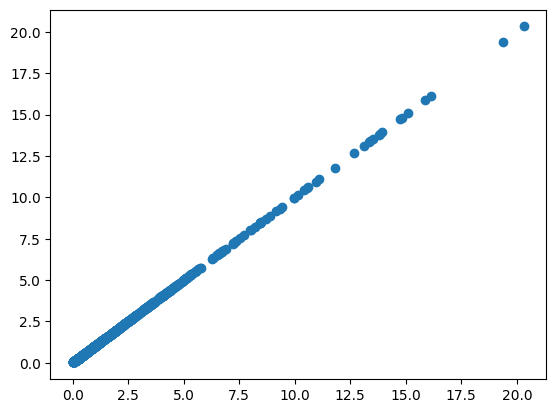

In [585]:
import matplotlib.pyplot as plt

# De las estadísticas previas, se puede asegurar que ambas columnas (calculadas y de dataset)
# poseen el mismo tamaño, por lo que el sgte. código no dará error.
plt.scatter(df["total_sales_millions"], df["total_sales_calculated_millions"])
plt.plot()

Analizando la gráfica, se puede determinar que las sumas son efectivamente solamente las de valores no NAs, por lo cual no se pueden inferir el resto de las ventas a través de cálculos.

Finalmente, se considera la fecha de última actualizacion como la fecha de lanzamiento si es que la fecha de ultima actualización está vacía. Luego, se convierten ambas columnas a datetime.

In [586]:
df["last_update"] = df.apply(lambda x: x["release_date"] if pd.isnull(x["last_update"]) else x["last_update"], axis=1)

df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")
df["last_update"] = pd.to_datetime(df["last_update"], format="%Y-%m-%d")

df.head(10)

,img,title,console,genre,publisher,developer,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update,total_sales_calculated_millions,calculated_difference_abs_millions
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013-09-17,20.33,0.01
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,19.39,0.00
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002-10-28,16.15,0.00
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013-09-17,15.87,0.01
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,15.08,0.01
5,/games/boxart/full_call-of-duty-modern-warfare...,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,2011-11-08,14.82,0.00
6,/games/boxart/full_call-of-duty-black-ops_5Ame...,Call of Duty: Black Ops,X360,Shooter,Activision,Treyarch,8.8,14.74,9.76,0.11,3.73,1.14,2010-11-09,2010-11-09,14.74,0.00
7,/games/boxart/full_4653215AmericaFrontccc.jpg,Red Dead Redemption 2,PS4,Action-Adventure,Rockstar Games,Rockstar Games,9.8,13.94,5.26,0.21,6.21,2.26,2018-10-26,2018-11-02,13.94,0.00
8,/games/boxart/full_1977964AmericaFrontccc.jpg,Call of Duty: Black Ops II,X360,Shooter,Activision,Treyarch,8.4,13.86,8.27,0.07,4.32,1.20,2012-11-13,2018-04-07,13.86,0.00
9,/games/boxart/full_4649679AmericaFrontccc.png,Call of Duty: Black Ops II,PS3,Shooter,Activision,Treyarch,8.0,13.80,4.99,0.65,5.88,2.28,2012-11-13,2018-04-07,13.80,0.00


In [587]:
import numpy as np

# Agregamos el año de lanzamiento para posteriores clasificaciones
# Método para sacar el año sacado de aquí: https://stackoverflow.com/a/25146337
df["release_year"] = df.apply(lambda x: int(x["release_date"].year) if not pd.isna(x["release_date"]) else np.nan, axis=1)
df

,img,title,console,genre,publisher,developer,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update,total_sales_calculated_millions,calculated_difference_abs_millions,release_year
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013-09-17,20.33,0.01,2013.0
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,19.39,0.00,2014.0
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002-10-28,16.15,0.00,2002.0
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013-09-17,15.87,0.01,2013.0
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,15.08,0.01,2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28,NaN,NaN,2016.0
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09,NaN,NaN,2020.0
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09,NaN,NaN,2020.0
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24,NaN,NaN,2019.0


### Exploración de datos con Python.

Primeramente, se visualizan los datos de ventas por año de lanzamiento.

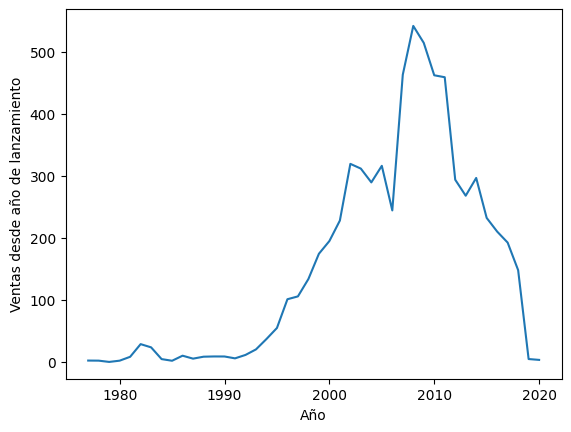

In [588]:
df_ordenado_por_anho = df[(df["release_year"].notna()) & (df["total_sales_millions"].notna())].sort_values(
    "release_year", 
    ascending=True
).groupby("release_year")["total_sales_millions"].agg("sum").reset_index().sort_values("release_year", ascending=True)

ventas_totales = df_ordenado_por_anho["total_sales_millions"]
anhos_lanzamiento = df_ordenado_por_anho["release_year"]

plt.plot(anhos_lanzamiento, ventas_totales)
plt.xlabel("Año")
plt.ylabel("Ventas desde año de lanzamiento")
plt.show()

del df_ordenado_por_anho

Un dato interesante a analizar es las ventas totales por género. Por lo cual, se visualiza una gráfica multivariada con el eje de las x correspondiendo a los géneros, y el eje de las y correspondiendo a las ventas totales.

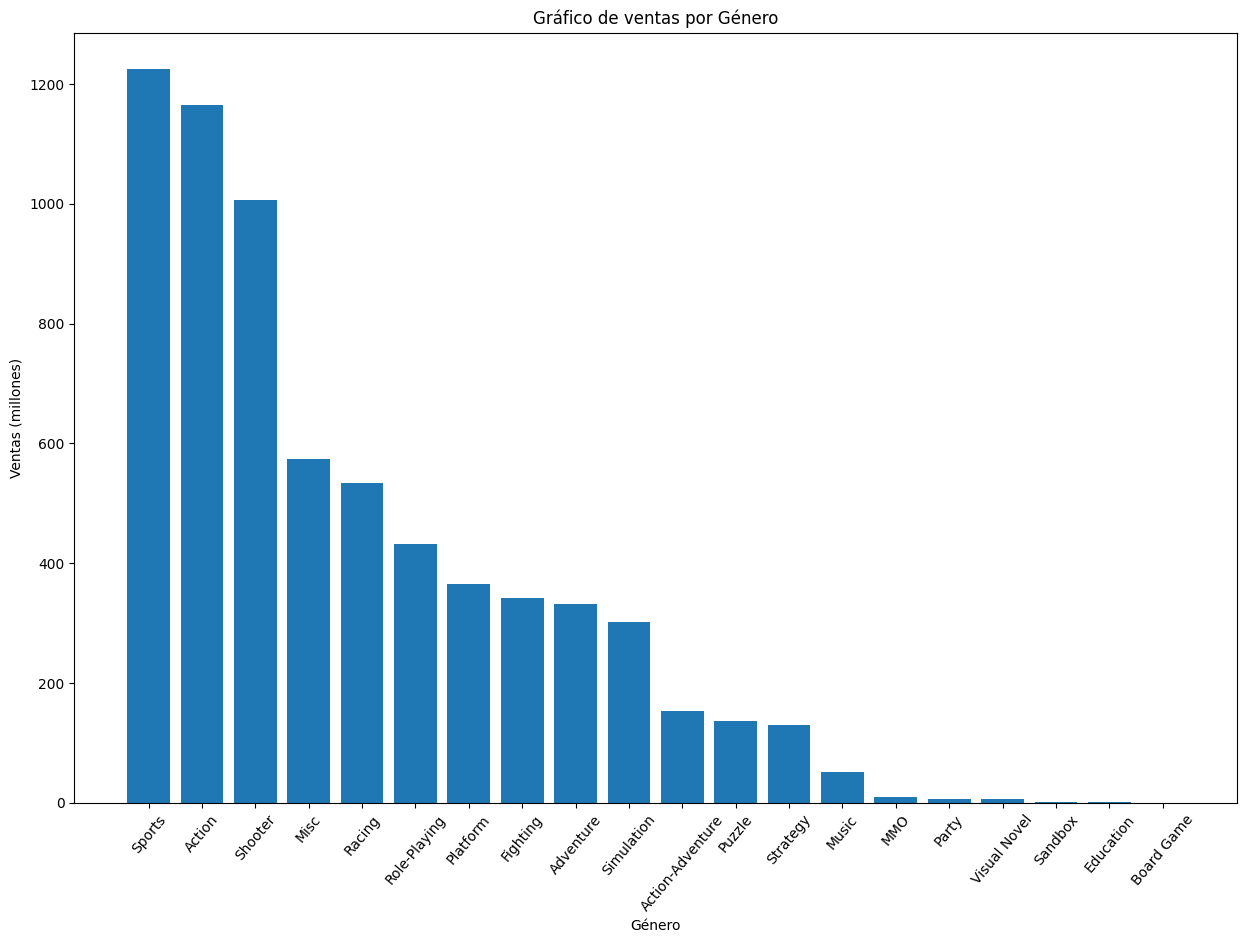

In [589]:
df_categorias_agrupadas = df.groupby("genre")["total_sales_millions"].agg("sum").reset_index().sort_values("total_sales_millions", ascending=False)
generos = df_categorias_agrupadas["genre"]
ventas_totales = df_categorias_agrupadas["total_sales_millions"]

plt.figure(figsize=(15, 10))
plt.bar(generos, ventas_totales)
plt.title("Gráfico de ventas por Género")
plt.xlabel("Género")
plt.ylabel("Ventas (millones)")
plt.xticks(rotation=50)
plt.show()

del df_categorias_agrupadas
del generos
del ventas_totales


De este gráfico se puede resaltar que los géneros que más ventas tienen son los de Sports, Action, y Shooter respectivamente

También, sería interesante ver los generos que más ventas tienen pero por región (en el dataset existen na_sales, jp_sales, pal_sales, other_sales)

Por lo cual se pueden crear 4 gráficos. Para resumir, solamente se muestran las 5 categorías más jugadas.

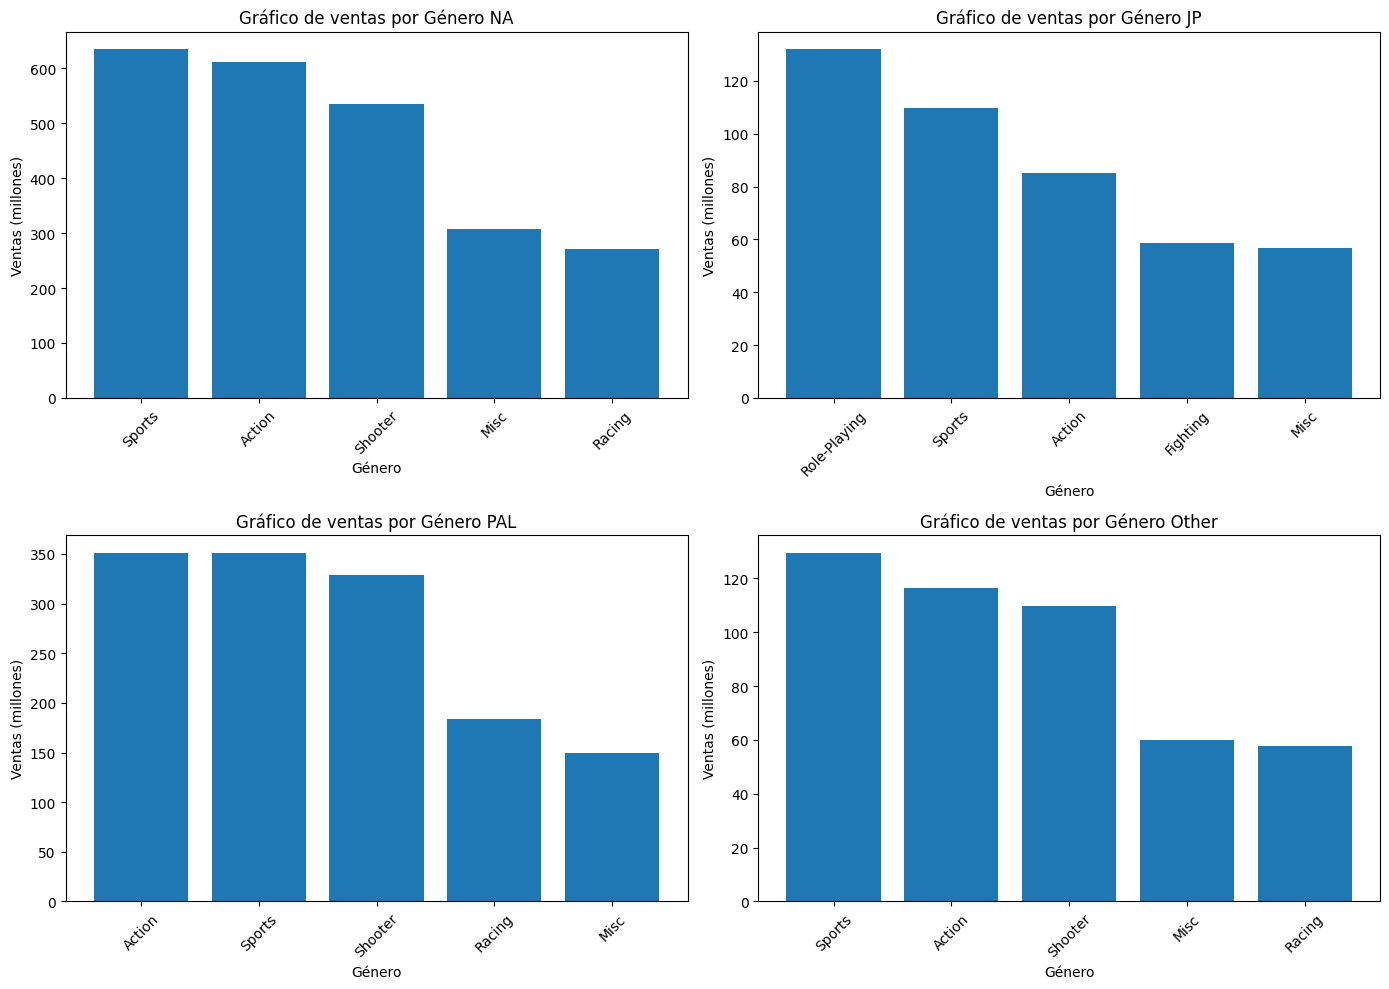

In [590]:
df_categorias_na_agrupadas = df.groupby("genre")["na_sales_millions"].agg("sum").reset_index().sort_values("na_sales_millions", ascending=False)
generos_na = df_categorias_na_agrupadas["genre"][:5]
ventas_na = df_categorias_na_agrupadas["na_sales_millions"][:5]

df_categorias_jp_agrupadas = df.groupby("genre")["jp_sales_millions"].agg("sum").reset_index().sort_values("jp_sales_millions", ascending=False)
generos_jp = df_categorias_jp_agrupadas["genre"][:5]
ventas_jp = df_categorias_jp_agrupadas["jp_sales_millions"][:5]

df_categorias_pal_agrupadas = df.groupby("genre")["pal_sales_millions"].agg("sum").reset_index().sort_values("pal_sales_millions", ascending=False)
generos_pal = df_categorias_pal_agrupadas["genre"][:5]
ventas_pal = df_categorias_pal_agrupadas["pal_sales_millions"][:5]

df_categorias_other_agrupadas = df.groupby("genre")["other_sales_millions"].agg("sum").reset_index().sort_values("other_sales_millions", ascending=False)
generos_other = df_categorias_other_agrupadas["genre"][:5]
ventas_other = df_categorias_other_agrupadas["other_sales_millions"][:5]

# Crear cuadrícula de axes: https://stackoverflow.com/a/31728991
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

ax1 = axes[0][0]

ax1.bar(generos_na, ventas_na)
ax1.set_title("Gráfico de ventas por Género NA")
ax1.set_xlabel("Género")
ax1.set_ylabel("Ventas (millones)")
ax1.tick_params(axis='x', labelrotation=45)

ax2 = axes[0][1]

ax2.bar(generos_jp, ventas_jp)
ax2.set_title("Gráfico de ventas por Género JP")
ax2.set_xlabel("Género")
ax2.set_ylabel("Ventas (millones)")
ax2.tick_params(axis='x', labelrotation=45)

ax3 = axes[1][0]

ax3.bar(generos_pal, ventas_pal)
ax3.set_title("Gráfico de ventas por Género PAL")
ax3.set_xlabel("Género")
ax3.set_ylabel("Ventas (millones)")
ax3.tick_params(axis='x', labelrotation=45)

ax4 = axes[1][1]

ax4.bar(generos_other, ventas_other)
ax4.set_title("Gráfico de ventas por Género Other")
ax4.set_xlabel("Género")
ax4.set_ylabel("Ventas (millones)")
ax4.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

Otro dato interesante a obtener sería un histograma de las reseñas de los usuarios. Por lo cual se realiza el histograma univariable.

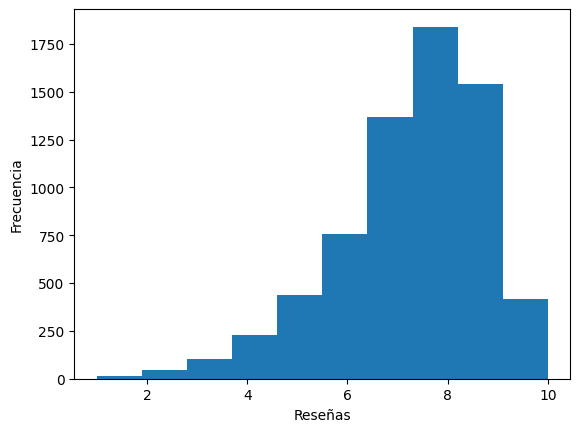

In [591]:
df_resenhas_no_vacias = df[df["critic_score"].notna()].sort_values("critic_score", ascending=True)
resenhas = df_resenhas_no_vacias["critic_score"]

plt.hist(resenhas)
plt.xlabel("Reseñas")
plt.ylabel("Frecuencia")
plt.show()

Se puede notar en el gráfico que la mayoría de las personas proporcionas calificaciones del rango entre 7 a 9.

Adicionalmente, se puede verificar el diagrama de boxplot de las reseñas

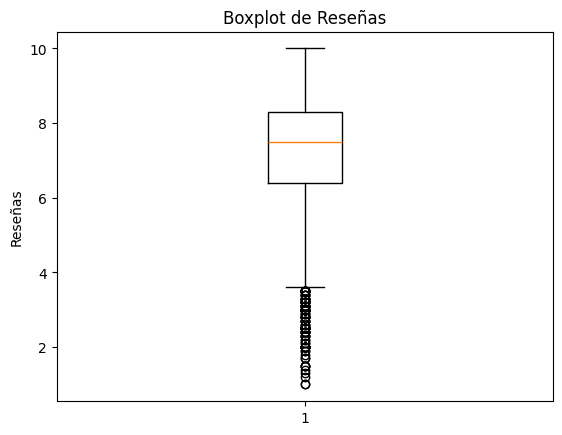

In [592]:
plt.boxplot(resenhas)

plt.title("Boxplot de Reseñas")
plt.ylabel("Reseñas")
plt.show()

del df_resenhas_no_vacias

Con este gráfico se pueden encontrar los outliers de las reseñas, que estan un poco por debajo de la calificación 4. Esto podría deberse a que a una gran cantidad de jugadores a los que realmente no les guste realmente el juego que compraron posiblemente ya no se molestaría en calificarlo.

### Análisis adicional

A continuación, se muestran las estadísticas del dataset

In [593]:
df.describe()

,critic_score,total_sales_millions,na_sales_millions,jp_sales_millions,pal_sales_millions,other_sales_millions,release_date,last_update,total_sales_calculated_millions,calculated_difference_abs_millions,release_year
count,6753.000000,18981.000000,12730.000000,6779.000000,12913.000000,15210.000000,56770,62066,2293.000000,2.293000e+03,56770.000000
mean,7.222225,0.356865,0.270611,0.103458,0.151579,0.043751,2006-11-13 20:47:42.244143104,2009-01-12 17:06:08.317597696,1.202080,4.186655e-03,2006.358323
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1971-12-03 00:00:00,1973-10-08 00:00:00,0.020000,0.000000e+00,1971.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000,2001-03-26 06:00:00,2002-09-23 00:00:00,0.270000,0.000000e+00,2001.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000,2008-09-16 00:00:00,2009-09-30 00:00:00,0.590000,1.110223e-16,2008.000000
75%,8.300000,0.350000,0.280000,0.120000,0.140000,0.030000,2012-12-27 00:00:00,2018-04-07 00:00:00,1.280000,1.000000e-02,2012.000000
max,10.000000,20.320000,9.760000,4.260000,9.850000,3.120000,2024-12-31 00:00:00,2024-01-28 00:00:00,20.330000,2.000000e-02,2024.000000
std,1.460124,0.821976,0.510291,0.174278,0.394288,0.126954,NaN,NaN,1.857228,5.022120e-03,8.621778


Una comparación interesante de realizar, es verificar si a medida que hay mas ventas para cierto título, los usuarios tienden a calificarlo mejor, o si la popularidad de un juego realmente no influye en las reseñas.

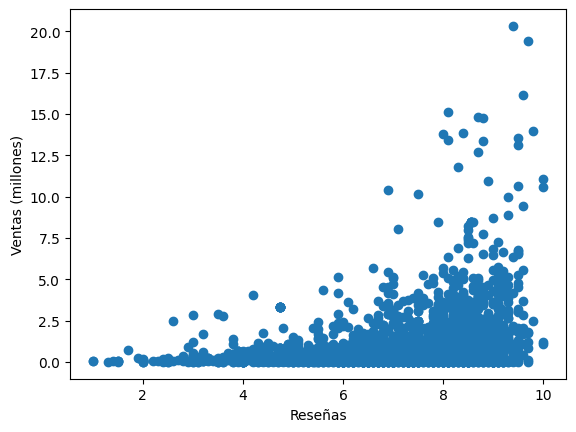

In [594]:
df_con_resenhas = df[(df["total_sales_millions"].notna()) & (df["critic_score"].notna())].sort_values("total_sales_millions", ascending=True)

total_ventas = df_con_resenhas["total_sales_millions"]
resenhas = df_con_resenhas["critic_score"]

plt.scatter(resenhas, total_ventas)
plt.xlabel("Reseñas")
plt.ylabel("Ventas (millones)")
plt.show()

del df_con_resenhas

Por lo que se puede notar, las calificaciones van aumentando conforme a la cantidad de ventas, pero no parece ser que este del todo relacionado.

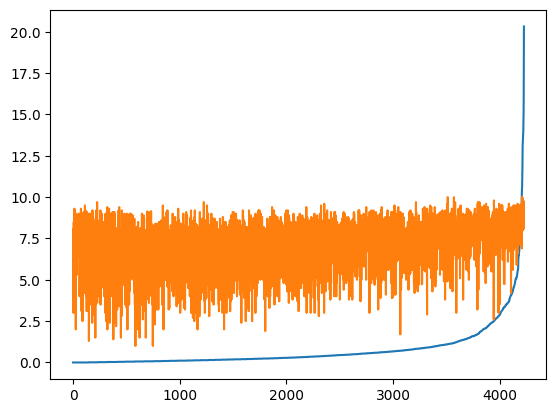

In [595]:
df_total_sales_no_na = df[(df["total_sales_millions"].notna()) & (df["critic_score"].notna())].sort_values("total_sales_millions", ascending=True)

datos_ventas = df_total_sales_no_na["total_sales_millions"]
resenhas = df_total_sales_no_na["critic_score"]

plt.plot(list(range(0, len(datos_ventas))), datos_ventas)
plt.plot(list(range(0, len(resenhas))), resenhas)

plt.show()

Según lo visto, si bien hay un leve incremento en las reseñas a medida que aumentan las ventas, la relación no es tan lineal, por lo cual no se puede utilizar las ventas como parámetro para predecir las calificaciones.

También, se puede analizar si la cantidad de ventas de un juego influye en las fechas de ultima actualización de alguna manera.

In [596]:
# Agregamos la columna de tiempo soportado
df["time_supported"] = df.apply(
    lambda x: x["last_update"] - x["release_date"] if x["last_update"] > x["release_date"] else x["last_update"] - x["last_update"], 
    axis=1,
)

[]

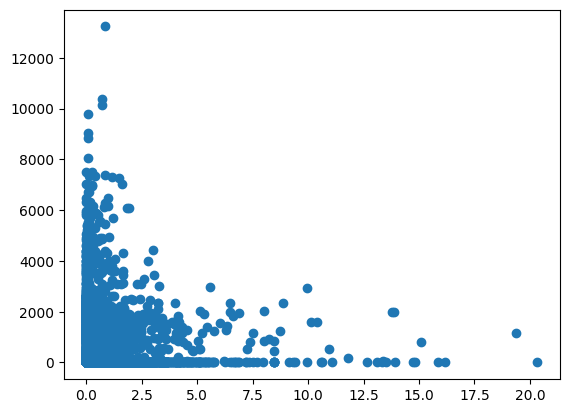

In [597]:
df_tiempo_soporte_existente = df[(df["time_supported"].notna()) & (df["total_sales_millions"].notna())]

total_ventas = df_tiempo_soporte_existente["total_sales_millions"]
tiempo_soporte = df_tiempo_soporte_existente["time_supported"].dt.days

plt.scatter(total_ventas, tiempo_soporte)
plt.plot()

Se puede notar a través de la gráfica que a la aplicación es mantenida por mayor tiempo en los rangos de alrededor de 0.0 millones de ventas hasta approx 4.0 millones de ventas. Tampoco se nota una correlación muy fuerte en este caso.

Finalmente, a modo de ejemplo, se agrega una predicción usando una ecuación de la recta.

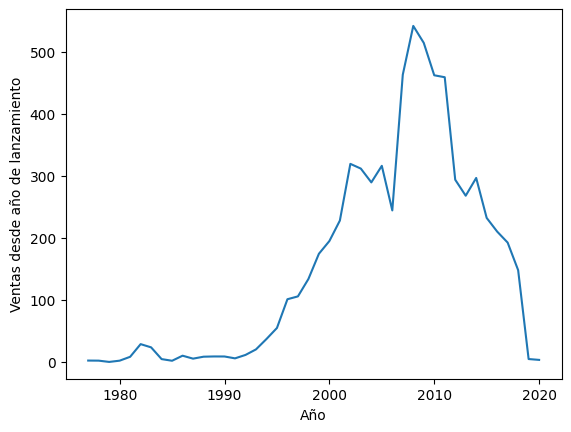

In [598]:
# Se vuelve a mostrar los datos ordenados por anho de lanzamiento.

df_ordenado_por_anho = df[(df["release_year"].notna()) & (df["total_sales_millions"].notna())].sort_values(
    "release_year", 
    ascending=True
).groupby("release_year")["total_sales_millions"].agg("sum").reset_index().sort_values("release_year", ascending=True)

ventas_totales = df_ordenado_por_anho["total_sales_millions"]
anhos_lanzamiento = df_ordenado_por_anho["release_year"]

plt.plot(anhos_lanzamiento, ventas_totales)
plt.xlabel("Año")
plt.ylabel("Ventas desde año de lanzamiento")
plt.show()

del df_ordenado_por_anho

Como los datos de los últimos años indican que las ventas están a la baja, se usarán solamente los datos a partir de que las ventas van cayendo. Se seleccionaron los años 2013 y 2019 ya que es un periodo en el que la tendencia es más o menos parecida a una línea (solamente es parecido).

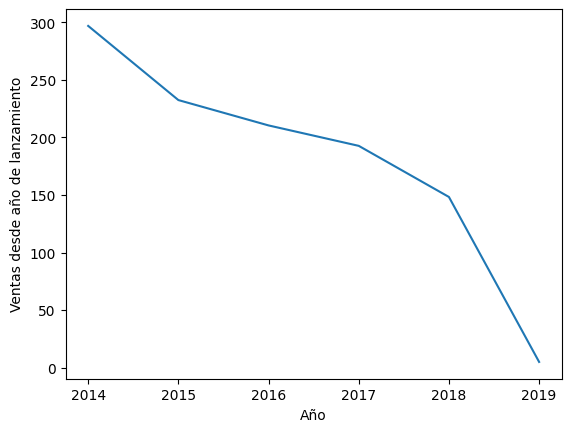

In [599]:

df_ordenado_por_anho = df[(df["release_year"].notna()) & (df["total_sales_millions"].notna()) & (df["release_year"] >= 2014) & (df["release_year"] <= 2019)].sort_values(
    "release_year", 
    ascending=True
).groupby("release_year")["total_sales_millions"].agg("sum").reset_index().sort_values("release_year", ascending=True)

ventas_totales = df_ordenado_por_anho["total_sales_millions"]
anhos_lanzamiento = df_ordenado_por_anho["release_year"]

plt.plot(anhos_lanzamiento, ventas_totales)
plt.xlabel("Año")
plt.ylabel("Ventas desde año de lanzamiento")
plt.show()

Se toma el primer y último valor para crear la ecuación de la recta

In [600]:
x1 = df_ordenado_por_anho.iloc[0, 0]
y1 = df_ordenado_por_anho.iloc[0, 1]
x2 = df_ordenado_por_anho.iloc[df_ordenado_por_anho.shape[0] - 1, 0]
y2 = df_ordenado_por_anho.iloc[df_ordenado_por_anho.shape[0] - 1, 1]

m = (y2 - y1) / (x2 - x1)
b = y2 - (m * x2)

df_ordenado_por_anho["total_sales_predicted_millions"] = df_ordenado_por_anho.apply(lambda x: m * x["release_year"] + b, axis=1)
df_ordenado_por_anho.head(10)

,release_year,total_sales_millions,total_sales_predicted_millions
0,2014.0,296.86,296.860
1,2015.0,232.44,238.478
2,2016.0,210.41,180.096
3,2017.0,192.67,121.714
4,2018.0,148.26,63.332
5,2019.0,4.95,4.950


Comparamos los datos reales con los predichos.

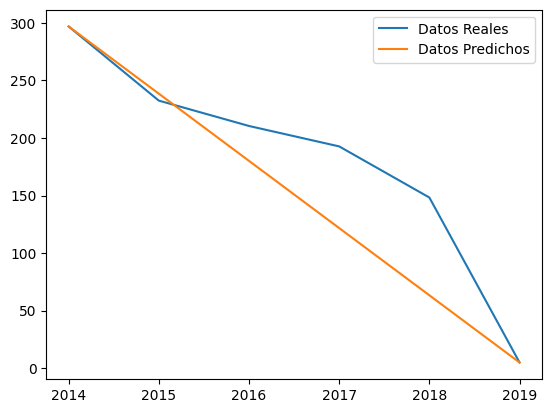

In [601]:
datos_predichos = df_ordenado_por_anho["total_sales_predicted_millions"]
datos_reales = df_ordenado_por_anho["total_sales_millions"]

plt.plot(anhos_lanzamiento, datos_reales, label="Datos Reales")
plt.plot(anhos_lanzamiento, datos_predichos, label="Datos Predichos")
plt.legend()
plt.show()

del df_ordenado_por_anho

Notar que esta predicción solamente funcionará en este rango, ya que en otros los datos se comportan diferente.